# Import Library

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

# Load Dataset

In [117]:
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [119]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [120]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print()

NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE/MORRIS HEIGHTS' 'HUNTS POINT'
 'KINGSBRIDGE HTS/UNIV HT

[' ']

BUILDING CLASS AT PRESENT
['C2' 'C7' 'C4' 'D5' 'D9' 'D7' 'D1' 'C6' 'D0' 'D4' 'RR' ' ' 'R2' 'R4' 'S3'
 'S4' 'S5' 'R1' 'R8' 'R9' 'K4' 'M9' 'M3' 'RK' 'RS' 'A9' 'A4' 'B3' 'B1'
 'S2' 'C0' 'R6' 'C5' 'C3' 'C1' 'D6' 'S9' 'O2' 'O1' 'O3' 'O5' 'O6' 'K1'
 'K2' 'L9' 'L8' 'L1' 'H1' 'H8' 'H3' 'R5' 'G6' 'P7' 'M1' 'N2' 'RB' 'RG'
 'RT' 'K9' 'V1' 'GW' 'G2' 'I7' 'M4' 'Z9' 'B9' 'D3' 'G9' 'I9' 'U6' 'O4'
 'L3' 'H2' 'E1' 'Z3' 'RW' 'C9' 'J5' 'N9' 'S1' 'A5' 'J8' 'B2' 'C8' 'F5'
 'Q1' 'G7' 'G5' 'G4' 'P2' 'Q9' 'Y1' 'RA' 'RP' 'O8' 'HR' 'G1' 'E7' 'I5'
 'R3' 'I4' 'H9' 'RH' 'D8' 'HB' 'J4' 'W2' 'P9' 'A7' 'D2' 'S0' 'O7' 'O9'
 'W3' 'HS' 'H6' 'J9' 'R0' 'HH' 'W8' 'W6' 'A1' 'K5' 'F1' 'V9' 'A2' 'V0'
 'G0' 'F4' 'E9' 'I3' 'W4' 'V3' 'I1' 'A6' 'Q8' 'A3' 'Z0' 'W1' 'U1' 'F2'
 'F9' 'GU' 'I6' 'G8' 'P5' 'Y3' 'W9' 'M2' 'G3' 'V6' 'K7' 'K3' 'R7' 'P8'
 'K6' 'V2' 'E2' 'Z2' 'T2' 'K8' 'P6' 'A0' 'H4' 'J1' 'CM' 'Z7']

ADDRESS
['153 AVENUE B' '234 EAST 4TH   STREET' '197 EAST 3RD   STREET' ...
 '49 PITNEY AVENUE' '2730 ARTHUR KILL ROAD'

# Data Cleaning

In [121]:
df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE', 'BLOCK', 'TAX CLASS AT TIME OF SALE'], axis=1, inplace=True)

In [122]:
df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [123]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.strip()


In [124]:
df.replace({' -  ': np.nan}, inplace=True)

In [125]:
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [126]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [127]:
df = df.dropna()

In [128]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)]

In [129]:
df = df[df['YEAR BUILT'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['SALE PRICE'] != 0]

In [130]:
df = df[df['TOTAL UNITS'] == df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS']]

# Measure of Central Tendency

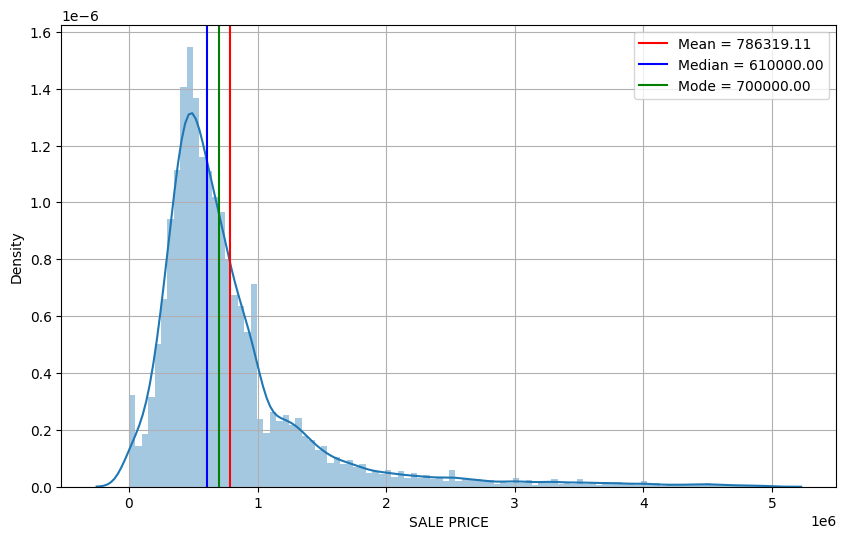

In [131]:
mean_ = df[(df['SALE PRICE'] > 100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean()
median_ = df[(df['SALE PRICE'] > 100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median()
mode_ = df[(df['SALE PRICE'] > 100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mode().values[0]

plt.figure(figsize=(10, 6))
sns.distplot(
    df[(df['SALE PRICE'] > 100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'],
    kde=True,
    bins=100
)

plt.axvline(
    mean_,
    color='red',
    label=f'Mean = {mean_:.2f}'
)
plt.axvline(
    median_,
    color='blue',
    label=f'Median = {median_:.2f}'
)
plt.axvline(
    mode_,
    color='green',
    label=f'Mode = {mode_:.2f}'
)

plt.grid()
plt.legend()
plt.show()

# Measure of Spread

In [132]:
# Range of sale price
range = df['SALE PRICE'].max() - df['SALE PRICE'].min()

# Standard deviation of sale price
std_ = df['SALE PRICE'].std()

# Variance of sale price
var_ = df['SALE PRICE'].var()

print("Range                : ", range)
print("Standard Deviation   : ", std_)
print("Variance             : ", var_)

Range                :  2209999999.0
Standard Deviation   :  17012835.32860294
Variance             :  289436565918160.25


# Probability Distribution

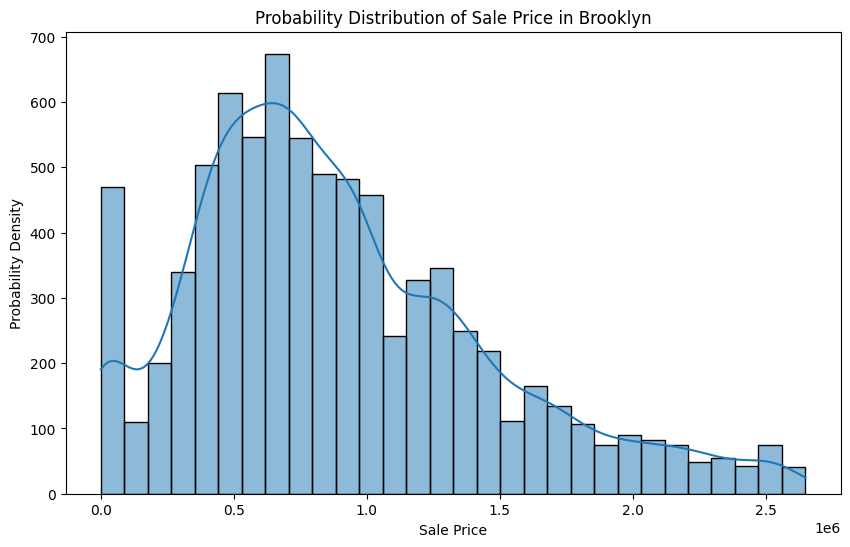

In [133]:
df_brooklyn = df[df['BOROUGH'] == 'Brooklyn']

Q1 = df_brooklyn['SALE PRICE'].quantile(0.25)
Q3 = df_brooklyn['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
brooklyn = df_brooklyn[(df_brooklyn['SALE PRICE'] > lower_bound) & (df_brooklyn['SALE PRICE'] < upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(brooklyn['SALE PRICE'], bins=30, kde=True) 
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.title(f'Probability Distribution of Sale Price in Brooklyn')
plt.show()


In [134]:
sample_size = len(df['SALE PRICE'])
confidence = 0.95
margin_of_error = stats.t.ppf((1 + confidence)/2, sample_size - 1 ) * (std_ / (sample_size ** 0.5))

lower_confidence = mean_ - margin_of_error
upper_confidence = mean_ + margin_of_error

print(f"Confidence Interval (95%) = {round(lower_confidence)}, {round(upper_confidence)}")

Confidence Interval (95%) = 591364, 981275


# Hypothesis testing

Null Hypothesis (H0) : The mean sale price in Manhattan is equal to the mean sale price in other boroughs

Alternative Hypothesis (H1) : The mean sale price in Manhattan is not equal to the mean sale price in other boroughs.

In [135]:
manhattan = df[df['BOROUGH'] == 'Manhattan']['SALE PRICE']
non_manhattan = df[df['BOROUGH'] != 'Manhattan']['SALE PRICE']

t_stat, p_stat = ttest_ind(manhattan, non_manhattan, equal_var=False)

print("T-Statistic : ", t_stat)
print("P-Statistic : ", p_stat)

alpha = 0.05
if p_stat < alpha:
    print("Null hypothesis rejected")
else:
    print("Not enough statistical evidence to reject the null hypothesis")

T-Statistic :  6.289158654340353
P-Statistic :  4.76291885002157e-10
Null hypothesis rejected
